<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Pablo Zambrano
               &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [1]:
# Paquetes necesarios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [13]:
url = "https://raw.githubusercontent.com/pazambrano/Aprendizaje-Automatico-Inicial/main/Auto_Sales_Cleaned%20(1).csv"
data = pd.read_csv(url)

data.columns
X = data.drop(columns=["DEALSIZE", "ORDERDATE"])
X = pd.get_dummies(X, drop_first=True)

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,...,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
1863,-0.841239,1.423384,0.628711,1.461931,0.823201,0.146423,-0.074108,-0.125375,-0.125375,-0.137901,...,-0.211419,-0.136177,-0.168991,-0.098238,-0.174608,-0.375897,-0.147853,-0.107285,-0.229581,1.390412
1219,-1.730553,-1.351029,-0.348564,-0.901607,0.418417,-0.228363,-0.074108,-0.125375,-0.125375,-0.137901,...,-0.211419,-0.136177,-0.168991,-0.098238,-0.174608,-0.375897,-0.147853,-0.107285,-0.229581,1.390412
494,0.677103,0.601335,-1.037098,-0.650239,-1.268590,-1.202806,-0.074108,-0.125375,-0.125375,-0.137901,...,-0.211419,-0.136177,-0.168991,-0.098238,-0.174608,-0.375897,-0.147853,-0.107285,-0.229581,1.390412
1751,0.774711,-0.837249,-1.405845,-1.316909,0.239051,-1.602578,-0.074108,-0.125375,-0.125375,-0.137901,...,-0.211419,-0.136177,-0.168991,-0.098238,-0.174608,-0.375897,-0.147853,-0.107285,-0.229581,1.390412
2429,1.013307,0.395823,0.674088,0.808437,1.040137,-0.253349,-0.074108,-0.125375,-0.125375,-0.137901,...,-0.211419,-0.136177,-0.168991,-0.098238,-0.174608,-0.375897,-0.147853,-0.107285,-0.229581,1.390412


Los datos han sido correctamente transformados mediante one-hot encoding y posteriormente estandarizados, garantizando que todas las variables contribuyan de forma equilibrada al cálculo de distancias en el algoritmo kNN.


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


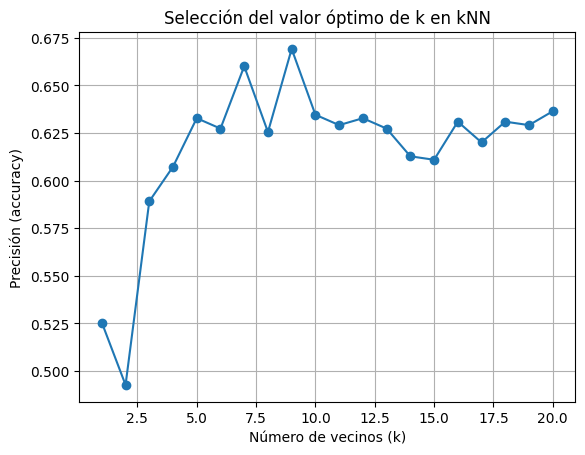

In [14]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))
plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión (accuracy)")
plt.title("Selección del valor óptimo de k en kNN")
plt.grid(True)
plt.show()

El codigo en el que hemos hecho explora valores en un rango de 1 a 20 en el que tambien pudimos una grafica a k vs la presicion en el que como tal buscamos maximizar el desempeño por decirlo asi, nuestro valor fue de k=9 y si aunque no es un k5 o k6 que son los mas comunes este conjunto de datos alcanza una precision mas alta con k=9 perimitiendo reducir el ruido por alta dimensionalidad y bueno ese es el valor que maximiza la precision.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [15]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6690909090909091
Confusion Matrix:
 [[  1  28   1]
 [  1 210  59]
 [  0  93 157]]

Classification Report:
               precision    recall  f1-score   support

       Large       0.50      0.03      0.06        30
      Medium       0.63      0.78      0.70       270
       Small       0.72      0.63      0.67       250

    accuracy                           0.67       550
   macro avg       0.62      0.48      0.48       550
weighted avg       0.67      0.67      0.65       550



El modelo se entreno con el K=9 sekeccionado anteriormente y se uso el conjunto de entrenamiento escalado, se genero a la vez la matriz de confusion observando un mejor comportamiento en las clases de medium y small, mientras que large tiene un bajo recall probablemente por un desbalance de clases.

---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [18]:
# Carga del dataset desde GitHub
url = "https://raw.githubusercontent.com/pazambrano/Aprendizaje-Automatico-Inicial/main/Auto_Sales_Cleaned%20(1).csv"
data = pd.read_csv(url)
data.head()
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,14082.800000,3562.000000,214.000000


In [21]:
# Variable objetivo
y = data["SALES"]
X = data.drop(columns=["SALES"])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Para el cambio a la regresion se cargo el conjunto orifginal nuevamente, se realizo una estadistica descriptiva inciial y se aplico nuevamnte one hot a las variables categoricas y estadnarizamiento a las variables predictoras


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [26]:
knn_reg = KNeighborsRegressor(n_neighbors=9)
knn_reg.fit(X_train_scaled, y_train)
# Predicción
y_pred = knn_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse
# La raiz de mse
rmse = np.sqrt(mse)
rmse

np.float64(1785.3321133522059)

Bueno se empieza crendo un modelo de knnn regresion en el que se indica en n neighbors el promedio de los 9 vecinos cercanos como lo usamos arriba de ahi el modelo se entrena en la parte knn_reg.fit es decir se usa los datos escalados que se basa mas en las distancias, en lo ultimos e calculo el error cuadratico medio que mide los errores entre los valores reales y los predichos pero se calculo a la vez la raiz ya de devuevlve el error en la misma unidad de la varibale objetivo(SALES) entonces en promedio se presenta un error de predccion de orden de 1785 unidades lo cual indica de cierta forma un desempeño razonable dentro del conjunto de los datos considerando la complejidad y heterogendeidad.